# Bootstrapping and CV

So we covered why and how we need to use cross validation in our model evaluation phase. The other technic to consider is bootstrapping - which means your train your model(s) in multiple recursive rounds, and every round (compared to the previous round) you add __one__ more feature into your feature list. In this way you can control if the latest feature would help or undermine the modeling performance.

Let's see that in action.

In [ ]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

In [ ]:
import pandas as pd
bc_df = pd.DataFrame(data.data, columns=data.feature_names)
bc_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
bc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

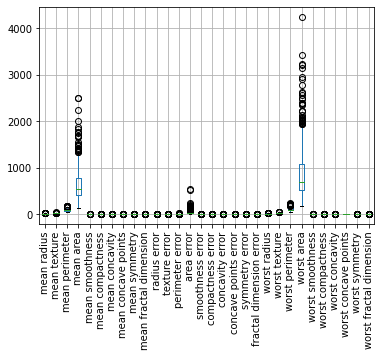

In [ ]:
bc_df.boxplot(rot=90);

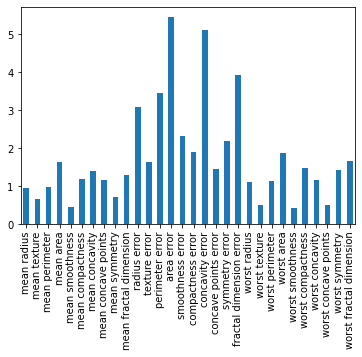

In [ ]:
bc_df.skew().plot(kind="bar");

From above boxplot we can observe:
- __IMPUTATION NOT NEEDED__
- __SCALING NEEDED__
- __OUTLIER HANDLING NEEDED__
- __SKEWNESS REMOVAL NEEDED__


In [ ]:
from sklearn.preprocessing import FunctionTransformer, PowerTransformer, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

import numpy as np

In [ ]:
## outlier handling function - IQR
def my_iqr(col):
  """outlier handling via the IQR method"""
  ### use np functions to better fit in pipeline
  iqr = 1.5 * (np.quantile(col,.75) - np.quantile(col,.25))
  u_bound = np.quantile(col,.75) + iqr
  l_bound = np.quantile(col,.25) - iqr
  col[col > u_bound], col[col < l_bound] = u_bound, l_bound
  return col

outlier_handler = FunctionTransformer(my_iqr)

In [ ]:
## Preprocessing pipeline
cont_preproc = Pipeline([
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),## imputer - no need here but as placeholder
    ("scaler", StandardScaler()), ## z-score scaler   
    ('outlier', outlier_handler), ## outlier handling
    ("skewness", PowerTransformer()), ## skewness removal    
])

In [ ]:
data_transformed = pd.DataFrame(cont_preproc.fit_transform(bc_df), columns=bc_df.columns)
data_transformed.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.171788,-2.483376,1.304472,1.202759,1.602365,1.891684,1.798788,1.794531,2.111883,2.000358,...,1.675151,-1.476858,1.827066,1.733794,1.347271,1.903319,1.836390,1.888108,2.144843,1.805556
1,1.679615,-0.286958,1.586156,1.711463,-0.849311,-0.393468,0.318307,0.833718,0.096639,-0.977615,...,1.631181,-0.317762,1.480882,1.692607,-0.349626,-0.312071,0.064503,1.103137,-0.141537,0.552657
2,1.514881,0.559044,1.507836,1.538880,1.002167,1.180742,1.414971,1.732548,1.028268,-0.303927,...,1.463201,0.054485,1.367319,1.511538,0.585704,1.240262,1.021592,1.740217,1.301158,0.470413
3,-0.794120,0.360945,-0.543035,-0.911084,2.165205,1.891684,1.687949,1.434362,2.111883,2.000358,...,-0.084331,0.217609,-0.040764,-0.515740,2.160570,1.903319,1.768517,1.888108,2.144843,1.942163
4,1.628034,-1.252365,1.644330,1.672532,0.342936,0.771891,1.419070,1.421394,0.084862,-0.528843,...,1.332560,-1.609190,1.361754,1.397105,0.276037,-0.139948,0.827643,0.812444,-0.978958,-0.280284


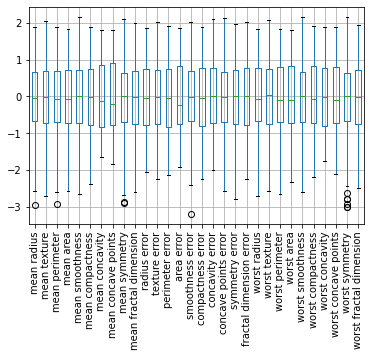

In [ ]:
data_transformed.boxplot(rot=90);

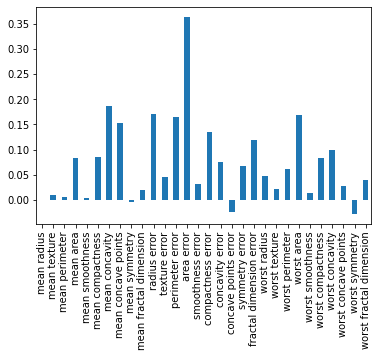

In [ ]:
data_transformed.skew().plot(kind="bar");

In [ ]:
data_transformed.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,3.746271e-17,1.00088,-2.940965,-0.679173,-0.052587,0.658392,1.893618
mean texture,569.0,-6.868164e-17,1.00088,-2.701744,-0.723612,-0.010734,0.680743,2.040424
mean perimeter,569.0,1.623384e-16,1.00088,-2.927431,-0.685857,-0.069752,0.697324,1.887001
mean area,569.0,2.497514e-17,1.00088,-2.562324,-0.717802,-0.070572,0.721739,1.829446
mean smoothness,569.0,-9.990056e-17,1.00088,-2.650357,-0.719344,0.015967,0.701177,2.165205
mean compactness,569.0,-1.623384e-16,1.00088,-2.369956,-0.790315,-0.030560,0.731855,1.891684
mean concavity,569.0,-4.995028e-17,1.00088,-1.648762,-0.839442,-0.125680,0.862036,1.798788
mean concave points,569.0,2.997017e-16,1.00088,-1.841237,-0.784272,-0.220650,0.911523,1.794531
mean symmetry,569.0,-2.497514e-17,1.00088,-2.890150,-0.709606,0.017613,0.638106,2.111883
mean fractal dimension,569.0,-1.857526e-16,1.00088,-2.589698,-0.758924,-0.022437,0.675904,2.000358


In [ ]:
# define the feature list to select from
feature_lst = data.feature_names
#type(feature_lst)
feature_lst

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
import warnings
warnings.filterwarnings('ignore')

We want to random shuffle the feature list since the order of features added to training may impact the results.

In [ ]:
# import numpy as np
np.random.shuffle(feature_lst)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold

selected_features = []
lr = LogisticRegression(penalty='l2',dual=False,max_iter=110)

f1_mean_series = []
f1_std_series = []
auc_mean_series = []
auc_std_series = []

for feat in feature_lst:
  selected_features.append(feat)
  X = data_transformed[selected_features]
  y = data.target
  #lr.fit(X,y)
  kfold = KFold(n_splits=5, random_state=2023, shuffle=True)
  f1_scores = cross_val_score(lr, X, y, cv=kfold, scoring='f1')
  roc_scores = cross_val_score(lr, X, y, cv=kfold, scoring='roc_auc')
  print('Current selected features', selected_features)
  print('\n')
  print('average f1 score (bias)', 1-f1_scores.mean())
  f1_mean_series.append(1-f1_scores.mean())
  print('average f1 score (variance)', f1_scores.std())
  f1_std_series.append(f1_scores.std())
  print('average AUC score (bias)', 1-roc_scores.mean())
  auc_mean_series.append(1-roc_scores.mean())
  print('average AUC score (variance)', roc_scores.std())
  auc_std_series.append(roc_scores.std())
  print('\n')

Current selected features ['worst concave points']


average f1 score (bias) 0.07236317288948868
average f1 score (variance) 0.01727774950598689
average AUC score (bias) 0.03192520095950191
average AUC score (variance) 0.012334756202088851


Current selected features ['worst concave points', 'worst compactness']


average f1 score (bias) 0.06768443560630355
average f1 score (variance) 0.014339960216379156
average AUC score (bias) 0.02992022443775233
average AUC score (variance) 0.012933221735479512


Current selected features ['worst concave points', 'worst compactness', 'mean fractal dimension']


average f1 score (bias) 0.06626750835882933
average f1 score (variance) 0.020694146131904047
average AUC score (bias) 0.023900405406485303
average AUC score (variance) 0.01449743031573194


Current selected features ['worst concave points', 'worst compactness', 'mean fractal dimension', 'worst radius']


average f1 score (bias) 0.04680740473899814
average f1 score (variance) 0.01438867766172

In [ ]:
eval_df = pd.DataFrame([f1_mean_series, f1_std_series, auc_mean_series, auc_std_series]).T
eval_df.columns=['F1-bias', 'F1-variance', 'AUC-bias', 'AUC-variance']
eval_df

,F1-bias,F1-variance,AUC-bias,AUC-variance
0,0.072363,0.017278,0.031925,0.012335
1,0.067684,0.014340,0.029920,0.012933
2,0.066268,0.020694,0.023900,0.014497
3,0.046807,0.014389,0.013976,0.010643
4,0.045270,0.012975,0.013707,0.010174
5,0.046524,0.013959,0.013843,0.010175
6,0.043385,0.019220,0.012044,0.008664
7,0.043385,0.019220,0.012115,0.008721
8,0.041256,0.022444,0.011446,0.011741
9,0.028406,0.023494,0.006106,0.008336


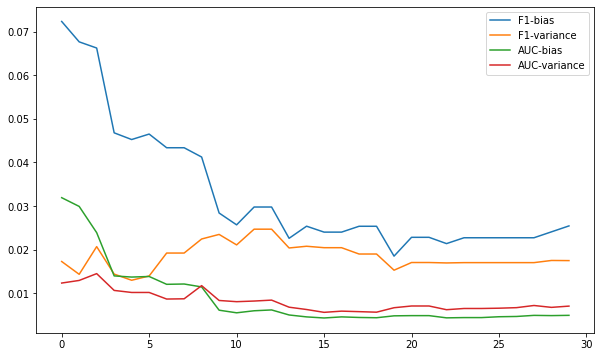

In [ ]:
eval_df.plot(figsize=(10,6));

In [ ]:
THRES = -0.001
TOLERANCE = 1

In [ ]:
def early_stop(metric, thres = THRES, tol = TOLERANCE):
  deltas = metric.shift(-1)[:-1] - metric[:-1]
  for i in range(0, len(deltas)):
    if (deltas[i:i+TOLERANCE+1]>THRES).all():
      return(i)

In [ ]:
early_stop(eval_df["F1-bias"])

10

In [ ]:
feature_lst[:early_stop(eval_df["F1-bias"])]

array(['worst concave points', 'worst compactness',
       'mean fractal dimension', 'worst radius', 'mean smoothness',
       'mean radius', 'perimeter error', 'mean perimeter',
       'worst concavity', 'mean texture'], dtype='<U23')

Alternatively, instead of randomly adding the features to the list, we can add the feature by the ranking of the feature importance scores.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=10)
rf_model.fit(data_transformed.values, data.target)
sorted_idx = rf_model.feature_importances_.argsort()
ranked_features = data.feature_names[sorted_idx]
ranked_features

array(['mean texture', 'worst concavity', 'mean concave points',
       'worst symmetry', 'area error', 'radius error', 'worst area',
       'smoothness error', 'worst texture', 'concave points error',
       'mean radius', 'mean smoothness', 'fractal dimension error',
       'mean area', 'mean concavity', 'mean symmetry',
       'worst compactness', 'mean compactness', 'worst fractal dimension',
       'concavity error', 'compactness error', 'mean fractal dimension',
       'perimeter error', 'worst concave points', 'worst radius',
       'worst smoothness', 'worst perimeter', 'mean perimeter',
       'symmetry error', 'texture error'], dtype='<U23')

In [ ]:
selected_features = []
lr = LogisticRegression(penalty='l2',dual=False,max_iter=110)

f1_mean_series = []
f1_std_series = []
auc_mean_series = []
auc_std_series = []

for feat in ranked_features:
  selected_features.append(feat)
  X = data_transformed[selected_features]
  y = data.target
  #lr.fit(X,y)
  kfold = KFold(n_splits=5, random_state=2023, shuffle=True)
  f1_scores = cross_val_score(lr, X, y, cv=kfold, scoring='f1')
  roc_scores = cross_val_score(lr, X, y, cv=kfold, scoring='roc_auc')
  print('Current selected features', selected_features)
  print('\n')
  print('average f1 score (bias)', 1-f1_scores.mean())
  f1_mean_series.append(1-f1_scores.mean())
  print('average f1 score (variance)', f1_scores.std())
  f1_std_series.append(f1_scores.std())
  print('average AUC score (bias)', 1-roc_scores.mean())
  auc_mean_series.append(1-roc_scores.mean())
  print('average AUC score (variance)', roc_scores.std())
  auc_std_series.append(roc_scores.std())
  print('\n')

Current selected features ['mean texture']


average f1 score (bias) 0.22065755914761864
average f1 score (variance) 0.024792130683616274
average AUC score (bias) 0.2205322456234664
average AUC score (variance) 0.025760799642109738


Current selected features ['mean texture', 'worst concavity']


average f1 score (bias) 0.1104424103479612
average f1 score (variance) 0.024904072656198088
average AUC score (bias) 0.06066100723592294
average AUC score (variance) 0.01672238238084605


Current selected features ['mean texture', 'worst concavity', 'mean concave points']


average f1 score (bias) 0.05281020224399202
average f1 score (variance) 0.024232919858857668
average AUC score (bias) 0.016766952250421463
average AUC score (variance) 0.006401081463332782


Current selected features ['mean texture', 'worst concavity', 'mean concave points', 'worst symmetry']


average f1 score (bias) 0.05140607728325075
average f1 score (variance) 0.014588037153011492
average AUC score (bias) 0.01622218203

In [ ]:
eval_df = pd.DataFrame([f1_mean_series, f1_std_series, auc_mean_series, auc_std_series]).T
eval_df.columns=['F1-bias', 'F1-variance', 'AUC-bias', 'AUC-variance']
eval_df

,F1-bias,F1-variance,AUC-bias,AUC-variance
0,0.220658,0.024792,0.220532,0.025761
1,0.110442,0.024904,0.060661,0.016722
2,0.052810,0.024233,0.016767,0.006401
3,0.051406,0.014588,0.016222,0.006657
4,0.043708,0.014052,0.010024,0.004033
5,0.034908,0.008260,0.007590,0.004939
6,0.026857,0.012031,0.007402,0.007357
7,0.025479,0.010777,0.008032,0.008710
8,0.025572,0.013219,0.007287,0.008901
9,0.024092,0.013168,0.007216,0.008929


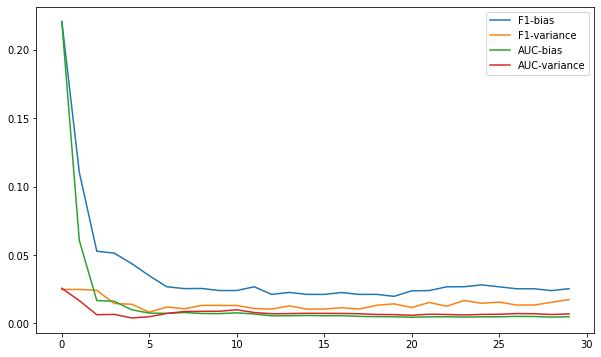

In [ ]:
eval_df.plot(figsize=(10,6));

In [ ]:
ranked_features[:early_stop(eval_df["F1-bias"])]

array(['mean texture', 'worst concavity', 'mean concave points',
       'worst symmetry', 'area error', 'radius error', 'worst area',
       'smoothness error', 'worst texture'], dtype='<U23')

We can observe that the improvement in terms of AUC is not significant after adding the `20th` feature in `ranked_features`.